# Koreliacija COVID-19 pandemijos metu
> BTC ir ETH koreliacija su rinkomis pandemijos metu.

- toc: true 
- badges: true
- comments: false
- categories: [Dominykas Tautkus]
- image: images/BTC_price.png

In [1]:
#hide
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px
from scripts.read_data import read_api
from scripts.read_data import read_news
from scripts.read_data import read_covid
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns 
from IPython.display import Markdown as md
sns.set()

In [2]:
#hide
df_all = read_api()
#df_all.index.name = 'date'

df_all.index = pd.to_datetime(df_all.index)
df_covid = df_all.loc[df_all.index > '2019-12-31 08:00:00']
df_covid = df_covid[['ETH', 'BTC', 'XAU', 'SP500']]
#df_covid = df_covid[['ETH', 'BTC', 'XAU']] ;

In [3]:
#hide
market = read_news('market')
covid = read_covid() ;

### Šios dienos kriptovaliutų ir pandemijos naujienos

In [4]:
#hide_input
#md('##### {}'.format(titleBTC)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(market['title'],'. ', market['body'], ' ...', market['url']))

- Let’s face reality… Is Bitcoin’s bull run really over?.  The constant volatility of the Bitcoin market has forced analysts to repeatedly change their lens from bearish to bullish and vice versa. Different market indicators, metrics, and analyses always tend to point in different directions, often flaming ongoing FUDs. At the time of writing, following months of bullish movement on the charts, the asset appeared [&#8230;] ... [| Skaityti daugiau](https://ambcrypto.com/lets-face-reality-is-bitcoins-bull-run-really-over/) 

In [5]:
#hide_input
#md('##### {}'.format(titleETH)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(covid['title'],'. ', covid['description'], ' ...', covid['url']))

- Boris Johnson urged to abandon ‘dangerous and unethical’ plan to lift Covid restrictions on 19 July.  ‘We consider any strategy that tolerates high level of infection to be both unethical and illogical,’ letter published in The Lancet medical journal says ... [| Skaityti daugiau](http://www.independent.co.uk/news/uk/politics/covid-boris-johnson-19-july-b1879959.html) 

### Kainų kaita pandemijos metu

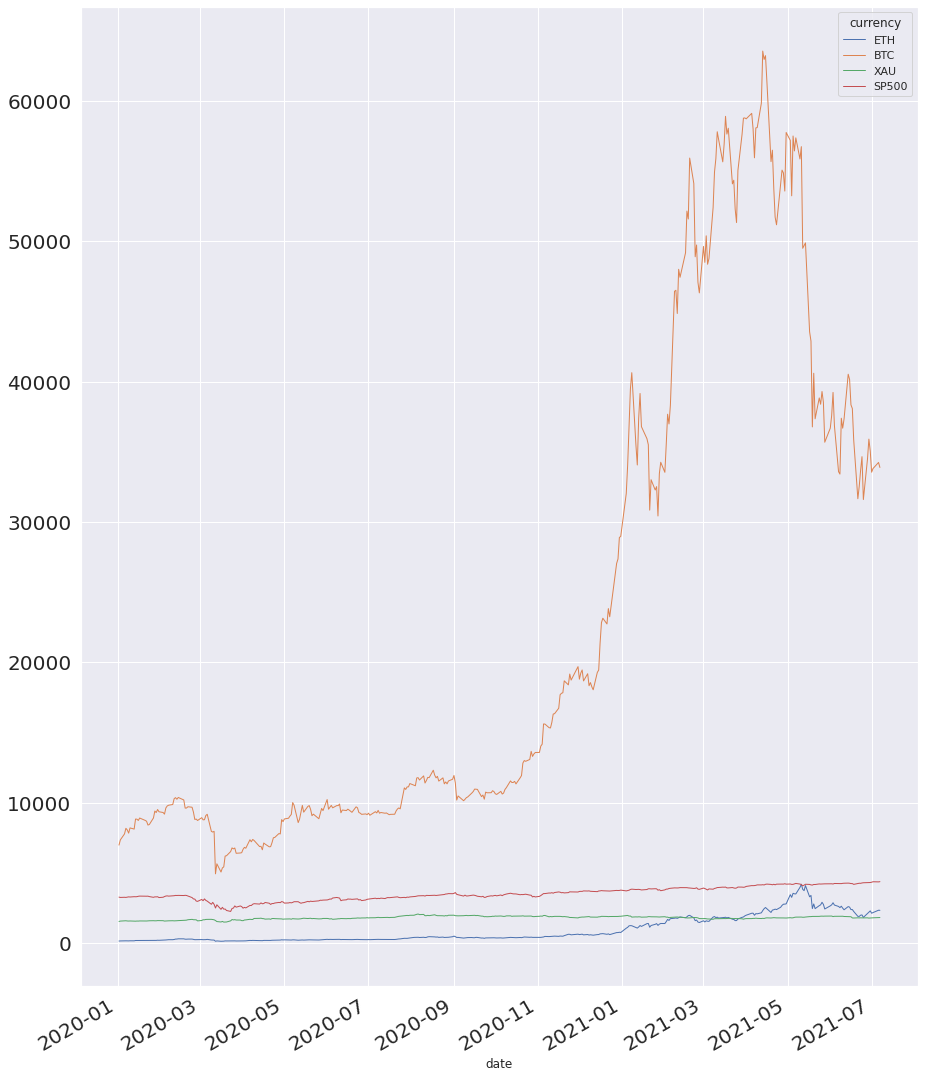

In [6]:
#hide_input
df_covid.plot(figsize=(15,20), linewidth=1, fontsize=20) ;
# plt.savefig('covid-price.eps', format='eps')

### Koreliacija pandemijos metu 

Koreliacijos koeficiento (Spirmano r) matrica.

In [7]:
#hide_input
df_covid.corr()  

currency,ETH,BTC,XAU,SP500
currency,,,,
ETH,1.000000,0.891803,0.205540,0.851404
BTC,0.891803,1.000000,0.139223,0.833880
XAU,0.205540,0.139223,1.000000,0.394166
SP500,0.851404,0.833880,0.394166,1.000000


In [8]:
#hide ### Koreliacijos matrica.

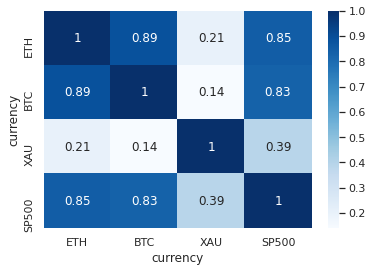

In [9]:
#hide
sns.heatmap(df_covid.corr(), annot=True, cmap="Blues") ;
# plt.savefig('covid.eps', format='eps')